# Project GEVPRO (H&M) - MAIN

We will work with the following dataset: 
Source: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview
This dataset has been reduced to use less memory. Only sales data from > 08-01-2020 is selected. 

In [2]:
# Used libaries:
%matplotlib inline
import pandas as pd
import seaborn as sns

### 0.  Research questions:
We try to answer the following research questions:
1. What are the most sold articles?
   - What is the most sold article?
2. What are the most sold types of articles?
3. What are the worst selling articles?
   - What is the least sold article?
4. What are the worst selling types of articles?
5. What color is the most popular?
6. What was the most succesful week in sales?
7. Do expensive (categories) sell better than cheaper articles? 

### 1.  Reducing the dataset: 
This is only ran on the default dataset (transactions_train.csv) found on kaggle to reduce the memory size to 91.3mb (instead of 3+gb).

In [3]:
# df = pd.read_csv('data/transactions_train.csv', low_memory=False)
# df['t_dat'] = pd.to_datetime(df['t_dat'])
# mask = df['t_dat'] > '08-01-2020'
# df_reduced = df.loc[mask]
# df_reduced.to_csv('C:\\Users\\Nils\\Jupyter Notebooks\\Project_gevpro\\transactions_reduced.csv')

In [4]:
# This loads the reduced transaction (sales) dataset.
customers = pd.read_csv('data/customers.csv', low_memory=False)
articles = pd.read_csv('data/articles.csv', low_memory=False)
transactions = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

### 2. Exploring the data

What are the most sold articles?

In [10]:
# What are the most sold articles?
transactions["article_id"].value_counts().head(10)

751471001    4037
918292001    3552
706016001    3471
448509014    2948
751471043    2939
915526001    2936
916468003    2769
896152002    2728
915529003    2697
866731001    2561
Name: article_id, dtype: int64

What is the most sold article?

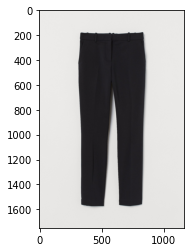

In [11]:
# The most sold article
import os
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.getcwd()+'/photos/'+str(751471001).zfill(10)+'.jpg')
imgplot = plt.imshow(img)
plt.show()

# The most sold article is a pair of black trousers.

What are the most sold types of articles?

Text(0, 0.5, 'Amount of sales')

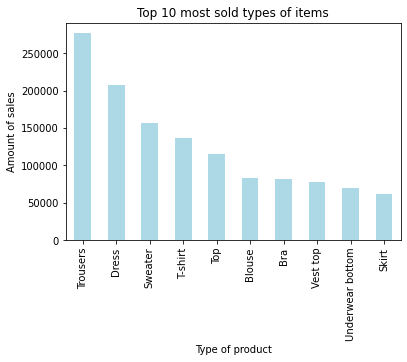

In [74]:
# What are the most sold types of articles?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["product_type_name"].value_counts().head(10).plot.bar(color="lightblue")

plt.title("Top 10 most sold types of items")
plt.xlabel("Type of product")
plt.ylabel("Amount of sales")

# The most sold type of item appear to be trousers.

What are the worst selling articles?

In [17]:
# What are the worst selling articles?
transactions['article_id'].value_counts().tail(10)

# These are 10 of the worst selling items in the transactions file.
# Of course there will also be items that aren't sold at all.
# These articles understandably don't appear in the transaction file.
# The amount of articles without sales will most likely be far too many to give as a reasonable output.
# Therefore we have decided to not consider items with 0 sales.

738675001    1
786101003    1
733753001    1
738572002    1
549914003    1
642230006    1
778833003    1
689389052    1
679687028    1
865792012    1
Name: article_id, dtype: int64

What is the least sold article?

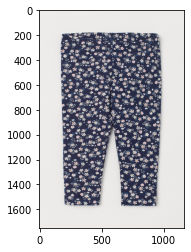

In [18]:
# One of the least sold articles
import os
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.getcwd()+'/photos/'+str(865792012).zfill(10)+'.jpg')
imgplot = plt.imshow(img)
plt.show()

What are the worst selling types of articles?

Text(0, 0.5, 'Amount of sales')

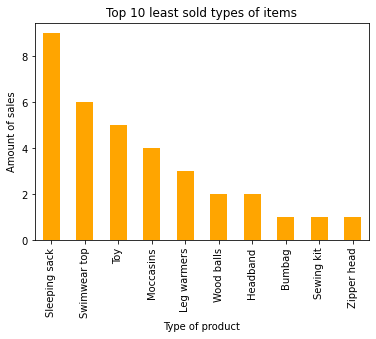

In [94]:
# What are the least sold types of articles?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["product_type_name"].value_counts().tail(10).plot.bar(color="orange")

plt.title("Top 10 least sold types of items")
plt.xlabel("Type of product")
plt.ylabel("Amount of sales")

# The least sold types of item appear to be the zipper head, sewing kit and bumbag.

What color is the most popular?

Text(0, 0.5, 'Amount of sales')

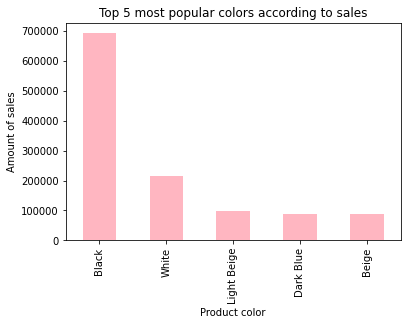

In [82]:
# What color is the most popular?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["colour_group_name"].value_counts().head(5).plot.bar(color="lightpink")

plt.title("Top 5 most popular colors according to sales")
plt.xlabel("Product color")
plt.ylabel("Amount of sales")

# It turns out that black is by far the most popular color.

What was the most succesful week in sales?

/var/folders/ks/rfh7nmts5vs6zw8vpfgx_vj00000gn/T/ipykernel_1051/1624348371.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = transactions['t_dat'].dt.week


Text(0, 0.5, 'Amount of sales')

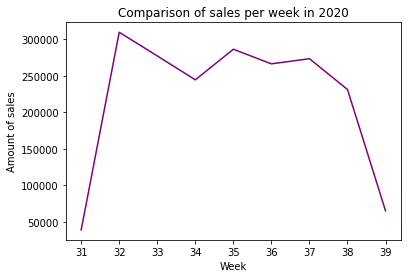

In [93]:
# How do the weekly sales compare?
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], errors ='coerce') 
week = transactions['t_dat'].dt.week
week.value_counts(sort=False).plot(color="purple")

plt.title("Comparison of sales per week in 2020")
plt.xlabel("Week")
plt.ylabel("Amount of sales")

# Week 32 was the most succesful in sales.
# This week lasted from the 3rd until the 9th of August 2020.